In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pip install pandas openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [13]:
df = pd.read_excel("car_dataset.xlsx",engine='openpyxl')

In [14]:
df.head()

,Source.Name,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price
0,cars.csv,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,800000
1,cars.csv,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,1000000
2,cars.csv,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,2500000
3,cars.csv,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,600000
4,cars.csv,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,850000


In [16]:
df.drop('Source.Name',axis = 1 , inplace = True)

In [17]:
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,850000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Price              100 non-null    int64 
dtypes: int64(7), object(5)
memory usage: 9.5+ KB


# check null values

In [18]:
df.isnull().sum()

Car_ID               0
Brand                0
Model                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Price                0
dtype: int64

In [19]:
df.describe()

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Price
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,50.500000,2018.39000,28150.000000,17.210000,1855.230000,158.130000,1.574000e+06
std,29.011492,1.17116,9121.375716,3.309902,631.311475,76.968137,1.000265e+06
min,1.000000,2016.00000,10000.000000,10.000000,999.000000,68.000000,4.500000e+05
25%,25.750000,2017.75000,22000.000000,15.000000,1462.000000,103.000000,7.000000e+05
50%,50.500000,2018.00000,27000.000000,17.000000,1774.000000,148.000000,1.300000e+06
75%,75.250000,2019.00000,32000.000000,19.000000,2143.000000,187.000000,2.500000e+06
max,100.000000,2021.00000,60000.000000,25.000000,4951.000000,396.000000,4.000000e+06


# Create new column

In [23]:
df["full_name"] = df["Brand"] + " " + df["Model"]

In [24]:
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price,full_name
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,800000,Toyota Corolla
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,1000000,Honda Civic
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,2500000,Ford Mustang
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,600000,Maruti Swift
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,850000,Hyundai Sonata


# Top 10 Most Common Car Brands

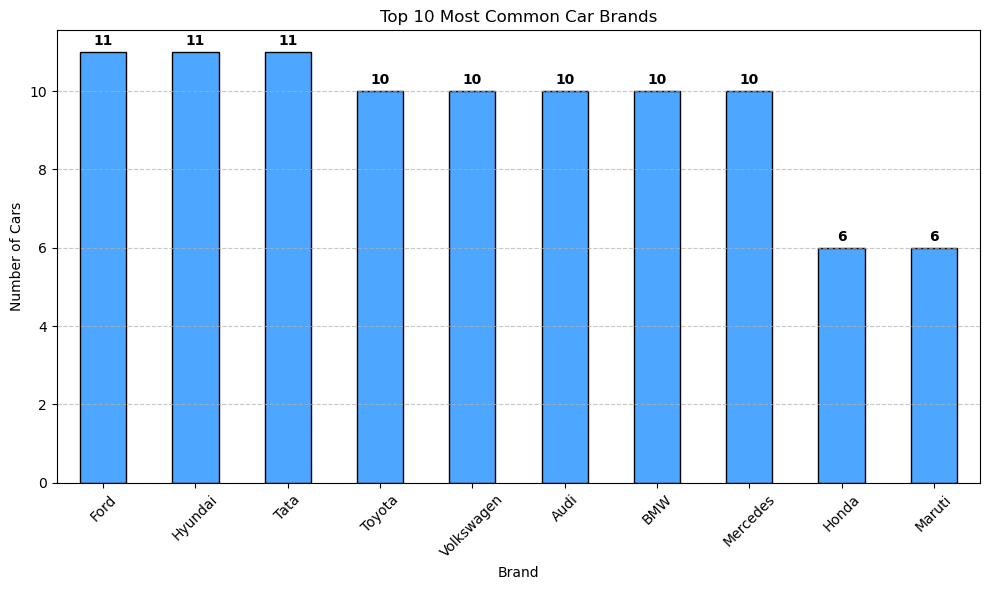

In [32]:
brand_counts = df['Brand'].value_counts().head(10)
plt.figure(figsize=(10,6))
brand_counts.plot(kind='bar', color='#4da6ff', edgecolor='black')
plt.title('Top 10 Most Common Car Brands')
plt.xlabel('Brand')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)

for i, val in enumerate(brand_counts.values):
    plt.text(i, val + 0.1, str(val), ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')


plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Distribution of Car Prices

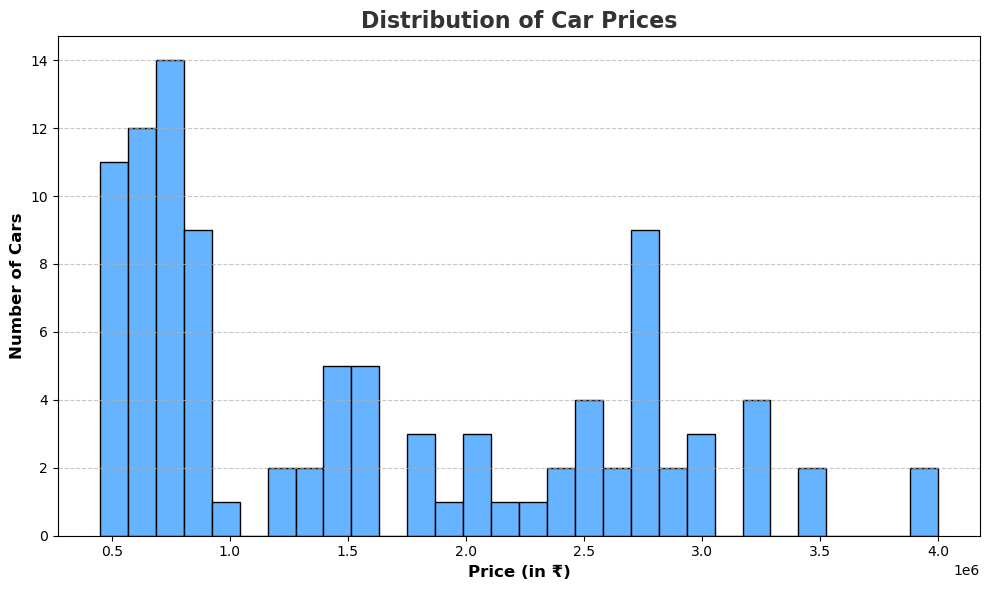

In [33]:
plt.figure(figsize=(10, 6))
plt.hist(df['Price'].dropna(), bins=30, color='#66b3ff', edgecolor='black')


plt.title('Distribution of Car Prices', fontsize=16, fontweight='bold', color='#333')
plt.xlabel('Price (in ₹)', fontsize=12, fontweight='bold')
plt.ylabel('Number of Cars', fontsize=12, fontweight='bold')


plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Price Distribution Across Fuel Type

C:\Users\akhil\AppData\Local\Temp\ipykernel_11104\283430776.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fuel_Type', y='Price', data=df, palette='Set2')


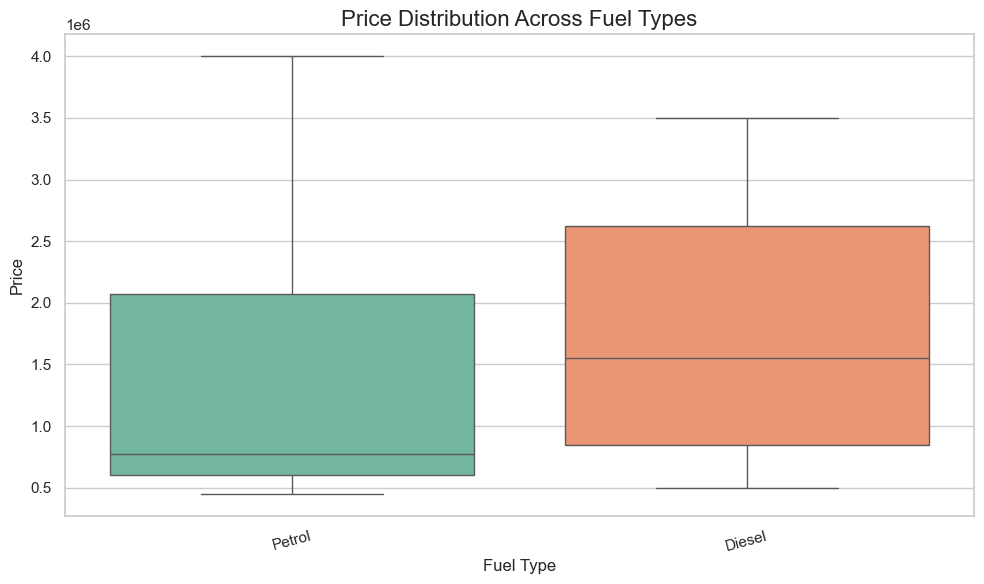

In [34]:
df = df.dropna(subset=['Price', 'Fuel_Type'])


sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel_Type', y='Price', data=df, palette='Set2')


plt.title('Price Distribution Across Fuel Types', fontsize=16)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Share of manual vs automatic cars

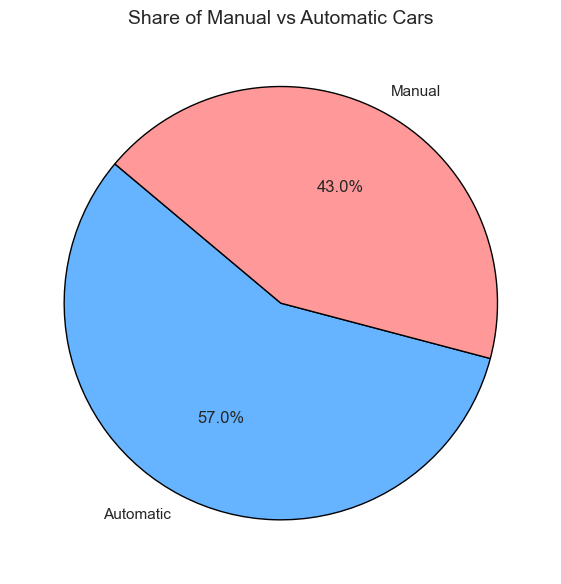

In [35]:
df = df.dropna(subset=['Transmission'])


transmission_counts = df['Transmission'].value_counts()


colors = ['#66b3ff', '#ff9999']
plt.figure(figsize=(6, 6))
plt.pie(transmission_counts, 
        labels=transmission_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors,
        wedgeprops={'edgecolor': 'black'})


plt.title('Share of Manual vs Automatic Cars', fontsize=14)
plt.tight_layout()
plt.show()

In [41]:
df.columns.values

array(['Car_ID', 'Brand', 'Model', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine',
       'Power', 'Price', 'full_name'], dtype=object)

# Frequency of different owner types

C:\Users\akhil\AppData\Local\Temp\ipykernel_11104\1808975656.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Owner_Type', palette='pastel', edgecolor='black')


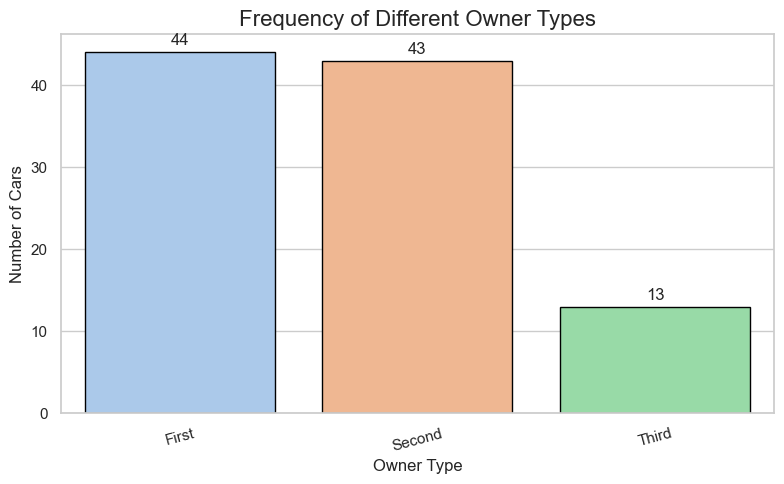

In [43]:
df = df.dropna(subset=['Owner_Type'])


sns.set(style="whitegrid")


plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='Owner_Type', palette='pastel', edgecolor='black')

for container in ax.containers:
    ax.bar_label(container, padding=3)


plt.title('Frequency of Different Owner Types', fontsize=16)
plt.xlabel('Owner Type', fontsize=12)
plt.ylabel('Number of Cars', fontsize=12)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# Average car price by year

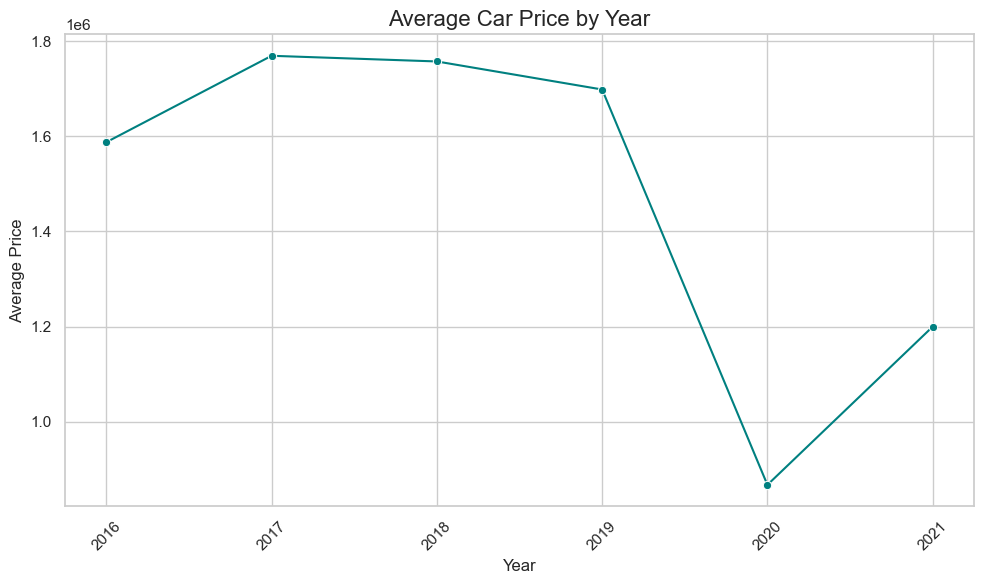

In [44]:
df = df.dropna(subset=['Year', 'Price'])


avg_price_by_year = df.groupby('Year')['Price'].mean().reset_index()


avg_price_by_year = avg_price_by_year.sort_values('Year')


sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_price_by_year, x='Year', y='Price', marker='o', color='teal')


plt.title('Average Car Price by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation between Mileage,Engine,Power,Price 

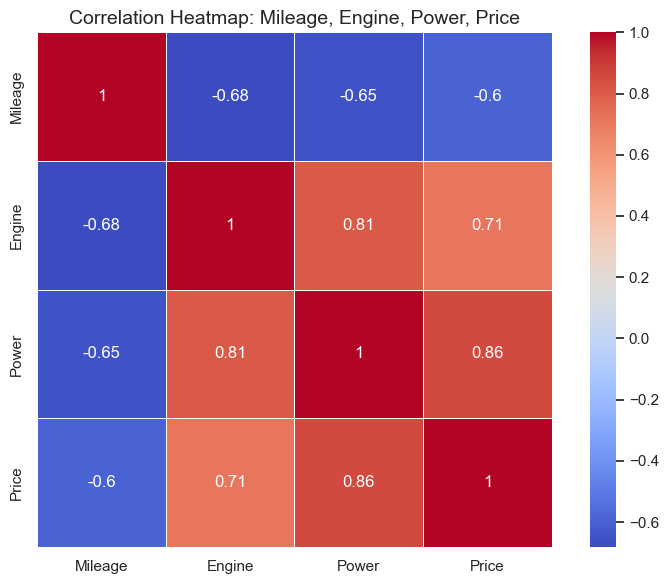

In [45]:
cols = ['Mileage', 'Engine', 'Power', 'Price']
df_corr = df[cols].dropna()


for col in cols:
    df_corr[col] = pd.to_numeric(df_corr[col], errors='coerce')


corr_matrix = df_corr.corr()


sns.set(style="white")


plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, square=True)


plt.title('Correlation Heatmap: Mileage, Engine, Power, Price', fontsize=14)
plt.tight_layout()
plt.show()


# Relationship between Mileage and Price

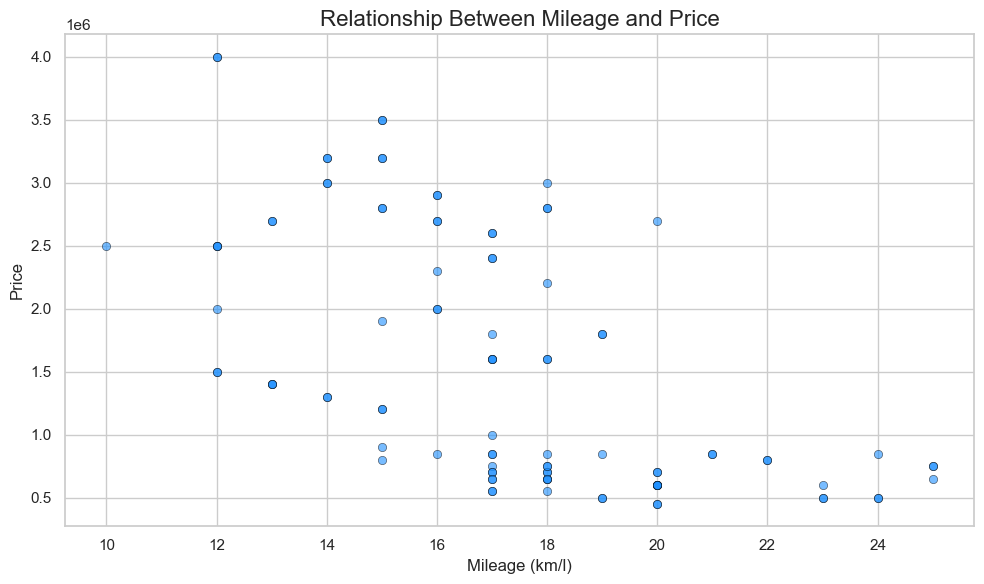

In [46]:
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Drop rows with non-convertible values
df = df.dropna(subset=['Mileage', 'Price'])

# Set plot style
sns.set(style="whitegrid")

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Mileage', y='Price', color='dodgerblue', edgecolor='black', alpha=0.6)

# Add title and labels
plt.title('Relationship Between Mileage and Price', fontsize=16)
plt.xlabel('Mileage (km/l)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()



# Sub Plots

C:\Users\akhil\AppData\Local\Temp\ipykernel_11104\2036007220.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fuel_Type', data=df, palette='Set2', ax=axes[0, 1])
C:\Users\akhil\AppData\Local\Temp\ipykernel_11104\2036007220.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.index, y=top_brands.values, palette='pastel', ax=axes[0, 2])
C:\Users\akhil\AppData\Local\Temp\ipykernel_11104\2036007220.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Owner_Type', y='Price', data=df, palette='Set3', ax=axes[1, 1])


Text(0.5, 1.0, 'Correlation Heatmap')

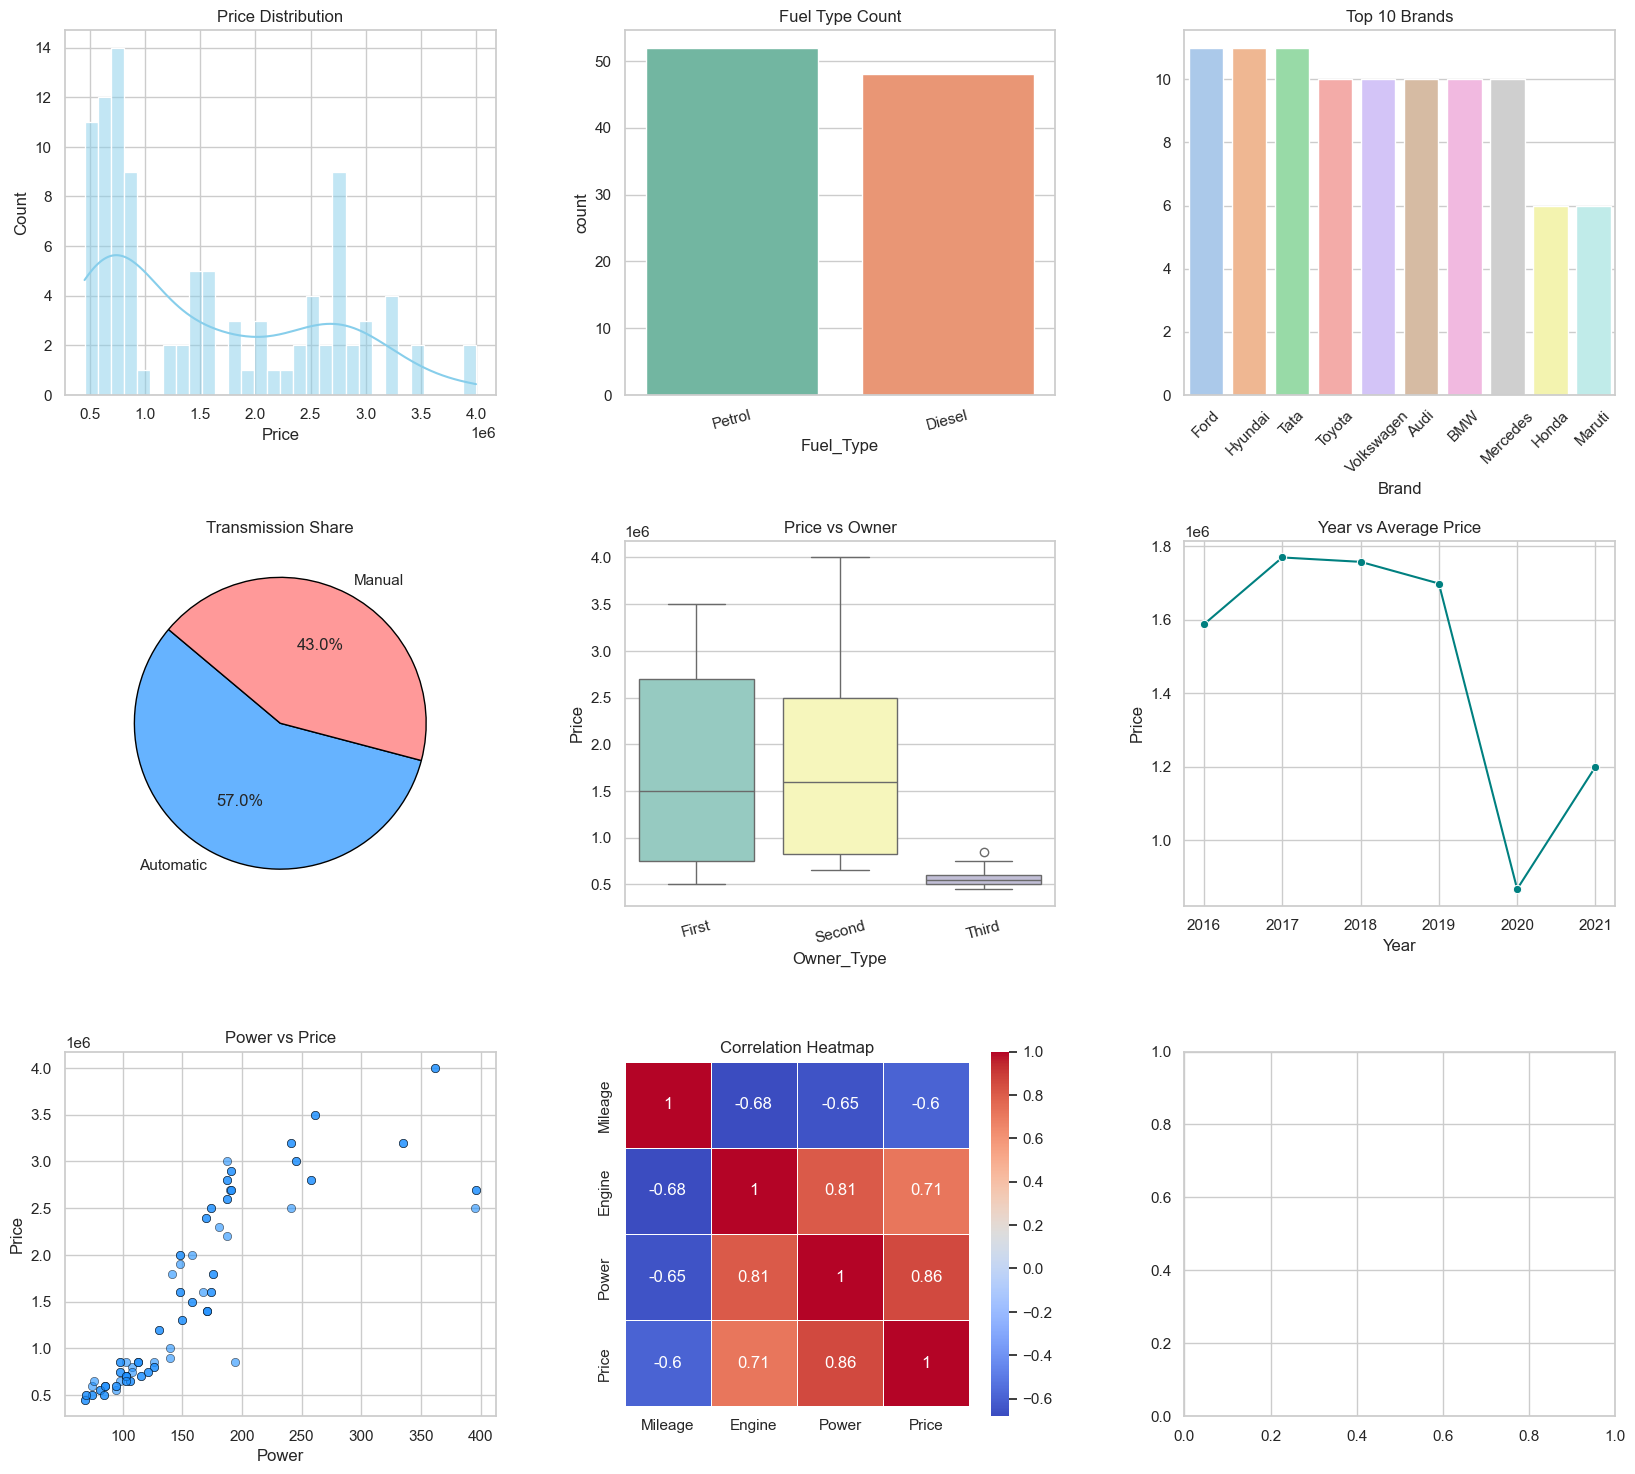

In [48]:
df = df.dropna(subset=['Price', 'Fuel_Type', 'Brand', 'Transmission', 'Owner_Type', 'Year', 'Power'])


avg_price_by_year = df.groupby('Year')['Price'].mean().reset_index().sort_values('Year')


corr_matrix = df[['Mileage', 'Engine', 'Power', 'Price']].dropna().corr()


sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 3, figsize=(20, 18))
plt.subplots_adjust(hspace=0.4, wspace=0.3)


sns.histplot(df['Price'], bins=30, kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Price Distribution')


sns.countplot(x='Fuel_Type', data=df, palette='Set2', ax=axes[0, 1])
axes[0, 1].set_title('Fuel Type Count')
axes[0, 1].tick_params(axis='x', rotation=15)


top_brands = df['Brand'].value_counts().nlargest(10)
sns.barplot(x=top_brands.index, y=top_brands.values, palette='pastel', ax=axes[0, 2])
axes[0, 2].set_title('Top 10 Brands')
axes[0, 2].tick_params(axis='x', rotation=45)


trans = df['Transmission'].value_counts()
axes[1, 0].pie(trans, labels=trans.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff', '#ff9999'], wedgeprops={'edgecolor': 'black'})
axes[1, 0].set_title('Transmission Share')


sns.boxplot(x='Owner_Type', y='Price', data=df, palette='Set3', ax=axes[1, 1])
axes[1, 1].set_title('Price vs Owner')
axes[1, 1].tick_params(axis='x', rotation=15)


sns.lineplot(data=avg_price_by_year, x='Year', y='Price', marker='o', color='teal', ax=axes[1, 2])
axes[1, 2].set_title('Year vs Average Price')


sns.scatterplot(data=df, x='Power', y='Price', color='dodgerblue', alpha=0.6, edgecolor='black', ax=axes[2, 0])
axes[2, 0].set_title('Power vs Price')


sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, square=True, ax=axes[2, 1])
axes[2, 1].set_title('Correlation Heatmap')
